<a href="https://colab.research.google.com/github/gks4478/TIL/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 23.04.07
코드를 많이 보고게게 도움이 되는거 같아서 우선 타이타닉 예제를 따라서 풀어보겠다.

In [1]:
# 데이터 불러오기 
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
rows_in_training_data = train.shape[0]
rows_in_testing_data = test.shape[0]

print(f'Rows in training data: {rows_in_training_data}.')
print(f'Rows in testing data: {rows_in_testing_data}.')
print(f'Total data: {rows_in_training_data + rows_in_testing_data}')

Rows in training data: 891.
Rows in testing data: 418.
Total data: 1309


In [3]:
# 결측치 확인
# 결측치가 있는 열만 불러와서 출력한다.
null_columns = train.columns[train.isnull().any()]
print('<train>')
print(train[null_columns].isnull().sum())
print()
# test
print('<test>')
null_columns = test.columns[test.isnull().any()]
print(test[null_columns].isnull().sum())

<train>
Age         177
Cabin       687
Embarked      2
dtype: int64

<test>
Age       86
Fare       1
Cabin    327
dtype: int64


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 상관관계(correlations): 숫자형 데이터끼리만 확인된다. 당연한건가 
# 상관관계는 양, 음, 0 으로 판단할 수 있다.
# 양 : 한 변수의 값이 증가면 다른 변수의 값도 증가한다.(두 변수가 양의 관계에 있다.)
# 음 : 한 변수가 감소하면 다른 변수도 감소한다.(두 변수가 음의 관계에 있다.)
# 0 : 두 변수간의 상관관계는 낮다고 혹은 없다고 판단할 수 있다.
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


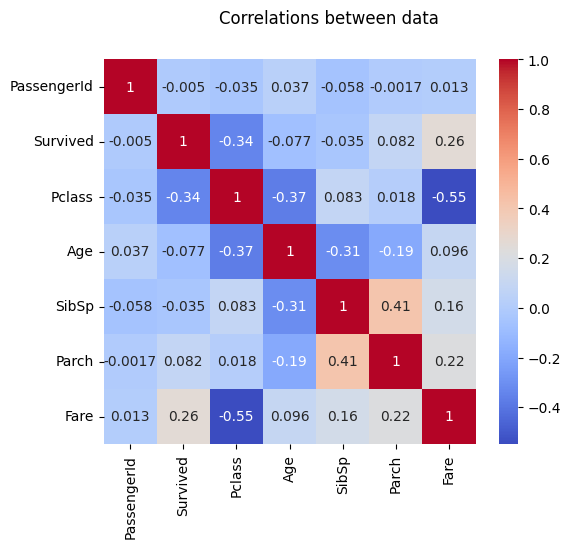

In [7]:
# 상관관계(correlations) 확인 
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (6, 5))
# 히트맵 그리기
sns.heatmap(train.corr(), annot = True, cmap = 'coolwarm', ax = ax)
# annot : 각 셀에 값을 표기 하는가 안하는가
# cmap : 색상 
# ax : 히트맵을 그릴 축 없으면 현재 걸 사용한다. 그래서 있으나 없으나 똑같았나
# 제목 작성
fig.suptitle('Correlations between data')
plt.show()

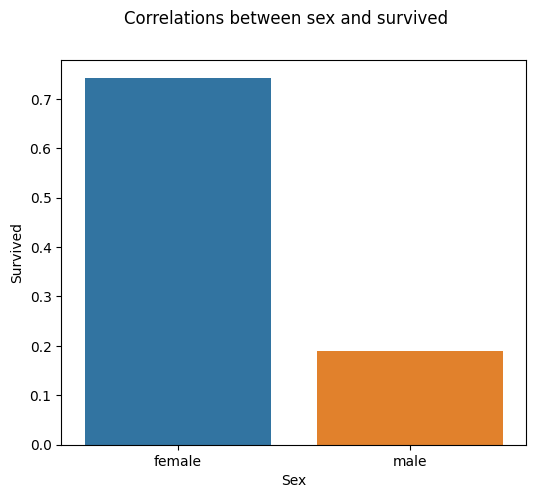

In [8]:
# 성별이 생존율에 영향이 있었는가?
sex_impact_on_survive = train[['Sex', 'Survived']].groupby('Sex')['Survived'].mean()
sex_impact_on_survive

# 막대 그래프로 시각화
fig, ax = plt.subplots(figsize = (6,5))
sns.barplot(x = 'Sex', y = 'Survived',
            data = sex_impact_on_survive.reset_index())
fig.suptitle('Correlations between sex and survived')
plt.show()
# 살아남은 사람중에 여자가 많음을 알 수 있었다.

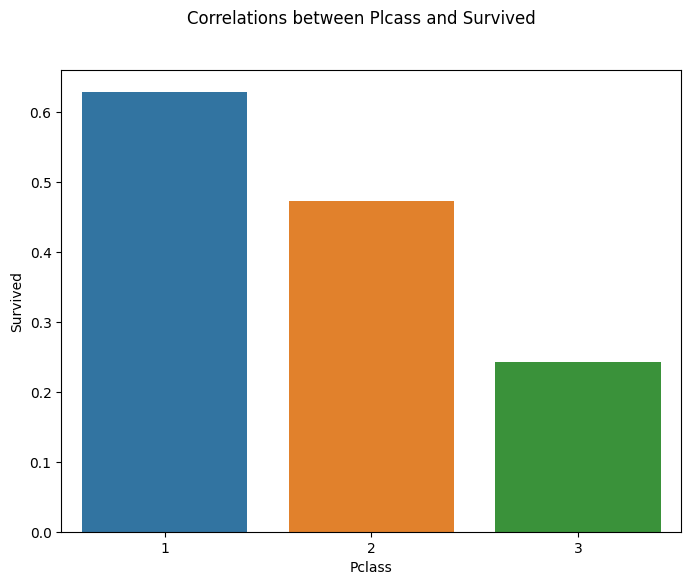

In [9]:
# 티켓이 생존에 영향에 영향이 있었는가?
pclass_impact_on_survive = train[['Pclass', 'Survived']].groupby('Pclass')['Survived'].mean()

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(x = 'Pclass', y = 'Survived',
            data = pclass_impact_on_survive.reset_index()) 
# reset_index가 없으면 항목을 찾을 수 없다고 오류가 난다!
fig.suptitle('Correlations between Plcass and Survived')
plt.show()
# 등급이 높은 순으로 살아남았음을 알 수 있다.

In [10]:
# PassengerId : 승객 번호(1~891)
# Survived    : 살았음 / 죽었음 (1/0)
# Pcalss      : 좌석 등급 (1 → 2 → 3)
# Name        : 이름
# Master(40), Miss(182), Mrs(129), Mr(518), Rev(6)신부, Dr(11)의사, Major(2)군인, 
# Col(10)대령, Capt(1)선장, Don(2), Mme(1), Ms(1), Countess(1)귀족, Jonkheer(1)귀족
# Sex         : 성별 (male / female)
# Age         : 나이 1살 미만이면 소수점 
# Sibsp       : 탑승자의 배우자, 형제자매 총 수
# Parch       : 부모와 자녀의 총 수 (유모와 탑승한 아이는 0)
# Ticket      : 티켓 고유 번호(삭제)
# Fare        : 돈
# Cabin       : 객실번호(삭제)
# Embarked    : 어디서 탑승했는가 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [11]:
'''
범주형 변수 (categorical columns)
- Name, Sex, Ticket, Cabin, Embarked
- 생존, 좌석등급도 범주형이 되지 않을까?
- 그냥 문자열로 되어 있는거를 변경하려는 건가?? 그런듯??
수치형 변수 (numberical columns)
- Survived, Pclass, Age, Fare, SibSp, Parch 
'''

'\n범주형 변수 (categorical columns)\n- Name, Sex, Ticket, Cabin, Embarked\n- 생존, 좌석등급도 범주형이 되지 않을까?\n- 그냥 문자열로 되어 있는거를 변경하려는 건가?? 그런듯??\n수치형 변수 (numberical columns)\n- Survived, Pclass, Age, Fare, SibSp, Parch \n'

In [12]:
# object 변수
categorical_cols = [col for col in train.columns if train[col].dtypes == 'object']
# number 변수
numberical_cols = [col for col in train.columns if train[col].dtypes != 'object']

# 확인
print(f'We have {len(categorical_cols)} categorical columns : {categorical_cols}')
print(f'We have {len(numberical_cols)} numberical columns :, {numberical_cols}')

We have 5 categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
We have 7 numberical columns :, ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [13]:
# 이 코드 작성자가 코드를 바꾸는 바람에 없어짐..
'''
# 데이터 나누기
from sklearn.model_selection import train_test_split

train_df = train.copy()

target = 'Survived'
feature = train_df.drop('Survived', axis = 1).columns

X_train = train_df[feature]
y_train = train_df[target]
X_test = test.copy()
'''

"\n# 데이터 나누기\nfrom sklearn.model_selection import train_test_split\n\ntrain_df = train.copy()\n\ntarget = 'Survived'\nfeature = train_df.drop('Survived', axis = 1).columns\n\nX_train = train_df[feature]\ny_train = train_df[target]\nX_test = test.copy()\n"

In [14]:
'''
# Name에서 호칭만 따로 분리하는 함수
def get_title(name : str) -> str:
  return name.split(',')[1].split()[0].rstrip('.')
# (name : str) : name을 str로 바꾸겠다는 것
# -> str : 이 함수가 문자열을 반환한다는 것

# 이름에서 호칭만 분류해서 Title이라는 열에 넣겠다.
X_train['Title'] = X_train['Name'].apply(get_title)
X_test['Title'] = X_test['Name'].apply(get_title)
# apply : 데이터 프레임, 시리즈의 각 원소에 함수를 적용해 데이터프레임, 시리즈로 반환하겠다.
# get_title(X_train['Name']) 은 안됨 요류남
'''

"\n# Name에서 호칭만 따로 분리하는 함수\ndef get_title(name : str) -> str:\n  return name.split(',')[1].split()[0].rstrip('.')\n# (name : str) : name을 str로 바꾸겠다는 것\n# -> str : 이 함수가 문자열을 반환한다는 것\n\n# 이름에서 호칭만 분류해서 Title이라는 열에 넣겠다.\nX_train['Title'] = X_train['Name'].apply(get_title)\nX_test['Title'] = X_test['Name'].apply(get_title)\n# apply : 데이터 프레임, 시리즈의 각 원소에 함수를 적용해 데이터프레임, 시리즈로 반환하겠다.\n# get_title(X_train['Name']) 은 안됨 요류남\n"

# 23.04.08

In [15]:
# 데이터를 정제하기 전에 train과 test를 합친다.
data = train.append(test)
# 이거는 나중에 다시 나누려고 하는거 같은데 
qty_train_rows = train.shape[0]

<ipython-input-15-bf383df7b982>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test)


In [16]:
data.shape

(1309, 12)

In [17]:
# Name에서 호칭만 따로 빼서 Name에 저장한다.
data['Title'] = data['Name'].apply(lambda name: name.split(',')[1].split()[0].rstrip('.'))

# 희귀한 호칭은 Other에 넣는다.
start_min = 10
# 10개 이상인 호칭만 True 아니면 False data['Title']
accepted_title_name = (data['Title'].append(data['Title']).value_counts() >= start_min)
data['Title'] = data['Title'].apply(lambda title : title if accepted_title_name.loc[title] == True else 'Other')
# 어차피 True False는 뒤에 붙은거 밖에 없고 기존에 있던거랑 같은거라 이렇게 한듯?
data['Title'].value_counts()

<ipython-input-17-09cb61f4e29a>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accepted_title_name = (data['Title'].append(data['Title']).value_counts() >= start_min)


Mr        757
Miss      260
Mrs       197
Master     61
Other      18
Rev         8
Dr          8
Name: Title, dtype: int64

In [18]:
# SibSp와 Parch를 가족이라고 생각하고 특성을 새로 생성한다.
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
# 1은 본인인듯?
data['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [19]:
# Cabin(객실번호)가 있는지 없는지로 판단한다.
# 객실이 없고 입석? 느낌으로 생각한건가?
# HasCabin에는 0이 아닌 값, 객실이 있는 값은 True, 아니면 False로 저장한다. 
data['HasCabin'] = data['Cabin'].fillna(0) != 0

In [20]:
# any는 값이 있으면 True 0이면 False를 출력한다.
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

cols_with_missing

['Survived', 'Age', 'Fare', 'Cabin', 'Embarked']

In [21]:
# 결측치 해소
# Age의 결측치를 중간값으로 채운다.
data['Age'].fillna(data['Age'].median(), inplace = True)

# Embarked를 최빈값을 채운다.
# mode는 최빈값을 출력해준다.
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

# Fare는 중간값으로 채운다.
data['Fare'].fillna(data['Fare'].median(), inplace = True)

In [22]:
# 스케일 작업 수치형 변수 
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

data[['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']] = scale.fit_transform(data[['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']])

In [23]:
# 범주형 변수 인코더
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# 성별 Sex 
data['SexCode'] = label.fit_transform(data['Sex'])
# 출발항구 Embarked
data['EmbarkedCode'] = label.fit_transform(data['Embarked'])
# 호칭 Title
data['TitleCode'] = label.fit_transform(data['Title'])
# (male : 1, female : 0) 이런식으로 바뀐듯 

In [24]:
data.sample(10)
# sample로 뽑아서 Survived에 없는 값이 있는 것임 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,HasCabin,SexCode,EmbarkedCode,TitleCode
318,1210,NaN,3,"Jonsson, Mr. Nils Hilding",male,-0.194041,-0.479087,-0.445000,350408,-0.491609,NaN,S,Mr,-0.558346,False,1,2,3
207,1099,NaN,2,"Collett, Mr. Sidney C Stuart",male,-0.426593,-0.479087,-0.445000,28034,-0.440455,NaN,S,Mr,-0.558346,False,1,2,3
280,1172,NaN,3,"Oreskovic, Miss. Jelka",female,-0.504111,-0.479087,-0.445000,315085,-0.475981,NaN,S,Miss,-0.558346,False,0,2,2
857,858,1.0,1,"Daly, Mr. Peter Denis",male,1.666380,-0.479087,-0.445000,113055,-0.130140,E17,S,Mr,-0.558346,True,1,2,3
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.581628,0.481288,0.710763,3101298,-0.405895,NaN,S,Mrs,0.705051,False,0,2,4
266,267,0.0,3,"Panula, Mr. Ernesti Arvid",male,-1.046733,3.362411,0.710763,3101295,0.123863,NaN,S,Mr,2.600146,False,1,2,3
311,1203,NaN,3,"Vartanian, Mr. David",male,-0.581628,-0.479087,-0.445000,2658,-0.503774,NaN,C,Mr,-0.558346,False,1,0,3
362,363,0.0,3,"Barbara, Mrs. (Catherine David)",female,1.201275,-0.479087,0.710763,2691,-0.364003,NaN,C,Mrs,0.073352,False,0,0,4
321,322,0.0,3,"Danoff, Mr. Yoto",male,-0.194041,-0.479087,-0.445000,349219,-0.490805,NaN,S,Mr,-0.558346,False,1,2,3
717,718,1.0,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,-0.194041,-0.479087,-0.445000,34218,-0.440455,E101,S,Miss,-0.558346,True,0,2,2


In [25]:
# 합쳤던 data에서 train, test set 나누기
# 원래 train 행은 871개 인데 인덱스 번호 870번까지 있으니까 딱 맞는거임
X_train = data[:qty_train_rows].copy()
X_test = data[qty_train_rows:].copy()

y_train = X_train.Survived.astype(int) # 원래 float형식이여서 int로 변경
X_train.drop(['Survived'], axis = 1, inplace = True)

In [26]:
# 특성 feature 고르기

feature = ['Pclass', 'Age', 'Fare', 'HasCabin', 'SexCode', 'TitleCode', 'FamilySize']

X_train = X_train[feature]
X_test = X_test[feature]

In [27]:
X_train.sample(5)

,Pclass,Age,Fare,HasCabin,SexCode,TitleCode,FamilySize
591,1,1.743897,0.869762,True,0,4,0.073352
491,3,-0.659146,-0.503291,False,1,3,-0.558346
460,1,1.433827,-0.130140,True,1,3,-0.558346
754,2,1.433827,0.613261,False,0,4,1.336749
407,2,-2.054461,-0.280947,False,1,1,0.705051


In [28]:
'''
- Logistic Regression은 이진 분류문제를 예측하는데 사용한다.
S자 형태의 곡선으로 나타내 0과 1사이의 값을 나타낸다.
여기서 임계치를 설정하여 0 또는 1의 값을 할당한다.

- Linear Regression은 연속적인 값을 예측하는데 사용한다.
'''

'\n- Logistic Regression은 이진 분류문제를 예측하는데 사용한다.\nS자 형태의 곡선으로 나타내 0과 1사이의 값을 나타낸다.\n여기서 임계치를 설정하여 0 또는 1의 값을 할당한다.\n\n- Linear Regression은 연속적인 값을 예측하는데 사용한다.\n'

In [29]:
'''
- GridSearch는 하이퍼파라미터를 최적화하는 기법 중 하나이다.
'''

'\n- GridSearch는 하이퍼파라미터를 최적화하는 기법 중 하나이다.\n'

# 23.04.09

In [36]:
# 로지스틱 회귀
# 파라미터 지정
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear']
}
# C : 모델의 가중치를 규제한다. 저 4개의 값중에 하나를 골라주는 것이다.
# penalty : 로지스틱 회귀의 가중치에 L1 또는 L2 유형의 규제를 지정한다.
# L1 : 일부 가중치를 0으로 만들어 feature selection 의 효과를 가져온다.
# feature selection 이란 중요하지 않은 병수를 제거하는 것이다.
# 불필요한 변수를 고려하지 않도록 하여 복잡도를 줄여 일반화 성능을 줄인다.
# L2 : 모든 가중치가 0에 가까워지도록 한다. 각 가중치의 크기를 작게 만든다.
# L1보다 모델을 덜 단순화하지만 데이터에 덜 민감해 일반적으로 안정적인 모델을 만든다.
# solver : 최적화 알고리즘 지정
# 최적화란 : 손실 함수를 최소화하거나 일반화 성능을 최대화하기 위한 모델의 파라미터를 값을 찾는 과정
# 손실 함수 : 모델이 예측한 출력값과 실제값 사이의 차이(오차)를 계산하는 함수이다.
# 일반화 : 모델이 새로운 데이터에 대해서 얼마나 잘 예측할 수 있는지를 나타내는 성능이다.
# liblinear는 로지스틱 회귀 모델에서 사용되는 최적화 알고리즘 중 하나이다.
# 이는 작은 데이터셋에 적합하다, 이진 분류문제를 다루는데 효과적이다.
# 이는 경사 하강법 기반으로 한다.

# 로지스틱 회귀 모델 생성
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_log = LogisticRegression(random_state = 0)

# gridseach 설정
grid_search = GridSearchCV(estimator = model_log,
                           param_grid = param_grid, 
                           cv = 5)

# GridSearchCV 훈련 fit
grid_search.fit(X_train, y_train)

# 가장 좋은 파라미터
print('가장 좋은 파라미터:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
# best_score는 기본으로 accuracy로 설정되어 있다.
# GridSearchCV에서 scoring = 'f1'을 하면 f1으로 구할 수 있다.

가장 좋은 파라미터: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7968489109283787


In [40]:
# KNeighborsClassifier
# k- 최근접 이웃 알고리즘을 기반으로 한 모델이다.
# 새로운 데이터가 주어졌을 때 가장 가까운 이웃들의 클래스로 분류한다.
# 새로운 데이터와 가장 가까운 k개의 이웃을 찾아 다수결 투표로 클래스를 결정한다.

# 파라미터 설정
param_kn = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
# n_neighbors : k-NN에서 고려할 이웃의 개수 지정 
# 이웃의 개수가 많으면 : 모델이 단순해지고, 과소적합될 가능성이 있다.
# 이웃의 개수가 적으면 : 모델이 복잡해지고, 과적합될 가능성이 있다.
# weights : 이웃의 가중치 설정
# uniform : 모든 이웃에 대해 동일한 가중치를 적용한다.
# distance : 거리에 반비례하는 가중치를 적용한다.
# algorithm : 이웃을 찾는 알고리즘 선택
# auto : 데이터의 크기에 따라 적절한 알고리즘을 자동으로 선택
# ball_tree, kd_tree : 트리 기반 알고리즘(큰 데이터셋)
# brute : 완전 탐색 알고리즘 (작은 데이터셋)

# KNeighborsClassifier 모델 생성
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()

# GridsearchCV
grid_kn = GridSearchCV(estimator = model_kn,
                       param_grid = param_kn,
                       cv = 5
)

# 훈련
grid_kn.fit(X_train, y_train)

print('KN 가장 좋은 파라미터:', grid_kn.best_params_)
print('KN 점수:', grid_kn.best_score_)

KN 가장 좋은 파라미터: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
KN 점수: 0.8181658401858012


In [46]:
# GaussianNB
# 나이브 베이즈(Naive Bayes) 분류기의 한 종류
# 나이브 베이즈 분류기 : 베이즈 정리를 이용하여 데이터를 분류하는 지도학습 알고리즘이다.
# 연속적인 실수값으로 이루어진 데이터를 다룰 때 사용한다.
# 확률 분포를 정규분포(Gaussian distribution)으로 가정한다.
# 분류가 간단하고 빠르게 이루어지며, 특히 데이터가 적을 때에도 잘 작동한다는 장점이 있다.
# 특성이 서로 독립이라는 가정을 사용한다.
# 이런거라면 타이타닉에서는 적합하지는 않은거 같은데..
# 타이타닉은 연속형, 범주형이 있고 대부분의 특성이 정규분포를 따르지 않아

# 파라미터 지정
param_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
# 그냥 이 모델이 이해가 안되는걸
# 다음에 더 자세히 살펴보도록 한다.

# 모델 생성
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

# GridSearchCV
grid_nb = GridSearchCV(estimator = model_nb,
                       param_grid = param_nb,
                       cv = 5) 

# 훈련
grid_nb.fit(X_train, y_train)

print("NB Best Parameters:", grid_nb.best_params_)
print('NB Best Score:', grid_nb.best_score_)

NB Best Parameters: {'var_smoothing': 1e-09}
NB Best Score: 0.7666248195342413


In [47]:
# XGBClassifier
# Gradient Boosting : 이전 모델의 오차를 최소화를 목표로 잔차를 학습한다.
# XGBClassifier : Gradient Boosting을 기본으로 한다. 속도가 빠르다.

# 파라미터 설정
param_xgb = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3,5,7],
    'n_estimators': [100, 200, 300]
}

# 모델 생성
from xgboost import XGBClassifier
model_xgb = XGBClassifier()

# GridSearchCV
grid_xgb = GridSearchCV(estimator = model_xgb,
                        param_grid = param_xgb,
                        cv = 5)

# 훈련
grid_xgb.fit(X_train, y_train)

print('XGB Best Parameters:', grid_xgb.best_params_)
print('XGB Best score:', grid_xgb.best_score_)

XGB Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
XGB Best score: 0.8473542150524136


In [52]:
# SVC (Support Vector Classifier)
# 분류 문제에서 사용되는 것 중 하나
# SVM(Support Vector Machine) 알고리즘으로 구현된다.
# SVM : 데이터를 고차원으로 변환하여 경계를 구분하는 초평면을 찾는다.
# 이때 결정 경계와 가장 가까이 있는 데이터 포인트들을 서포트 벡터(Support Vector)라고 한다.
# SVM의 목적은 결정 경계와 서포트 벡터들 사이의 거리(margin)를 최대화 하는 것이다.
# 모르겠다. 그냥 이런게 있구나 하고 넘어간다...

# 파라미터
param_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# 모델 생성
from sklearn.svm import SVC
model_svc = SVC(probability = True)

# GridSearchCV
grid_svc = GridSearchCV(estimator = model_svc,
                        param_grid = param_svc,
                        cv = 5)

grid_svc.fit(X_train, y_train)

print('SVC Best parameters:', grid_svc.best_params_)
print('SVC Best score:', grid_svc.best_score_)

SVC Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC Best score: 0.8282656455966354


In [54]:
# RandomForestClassifier

# 파라미터 설정
param_rf = {
    'n_estimators': [10, 30, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'auto', 'sqrt', 'log2', 0.2, 0.5],
    'max_depth': [None, 3,5,10,15,20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1,2,4,8],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsaple']
}
# n_estimaotors : rf에서 생성할 결정트리 개수 지정
# criterion : 불순도 계산하는 방법
# 불순도란 노드 내의 데이터들이 서로 다른 클래스에 속하는 정도를 나타낸다.
# 값이 작을수록 순도가 높은 것이다.
# 이 목표는 불순도를 작게하는 것이다.
# max_features : 각 노드에서 분할에 사용할 특성의 최대 개수를 지정한다.
# None은 모든 특성을 사용한다, 숫자나 문자열로 지정하면 그만큼 랜덤하게 선택한다.
# max_depth : 결정트리 최대 깊이 지정, 과적합을 방지하기 위해 작게 설정하는 것이 좋다.
# min_sample_split : 분할을 위해 노드가 가져야 하는 최소 샘플 수를 지정한다.
# 이 값보다 작은 샘플 수가 있다면 더 이상 분할하지 않는다.
# min samples_leaf : 리프 노드가 가져야 하는 최소 샘플 수를 지정한다.
# bootsrap : 부트 스트랩 샘플링 여부를 지정한다
# True(복원 추출), False(비복원 추출)
# 복원 추출 : 같은 데이터를 중복해서 선택 
# class_weight : 클래스 가중치치

# 모델 생성
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 0)

# GridSearchCV
grid_rf = GridSearchCV(estimator = model_rf,
                       param_grid = param_rf,
                       cv = 2)

# 훈련
grid_rf.fit(X_train, y_train)

print('rf best parameters:', grid_rf.best_params_)
print('rf best score:', grid_rf.best_score_)

# 너무 오래걸려 

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

KeyboardInterrupt: ignored

In [55]:
# 지금까지 최고의 파라미터로 모델을 만들자
lr = LogisticRegression(random_state = 0, C = 1.0, penalty = 'l1', solver = 'liblinear')
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, weights = 'uniform')
gnb = GaussianNB(var_smoothing = 1e-09)
svc = SVC(random_state = 0, C = 10, gamma = 'scale', kernel = 'rbf', probability = True)
xgb = XGBClassifier(random_state = 0, learning_rate = 0.1, max_depth = 3, n_estimators = 300)

In [57]:
# votingClassifier
# 다수결 투표를 기바능로 다른 분류기들의 예측 결과를 결화여 최종 예측 결과를 도출하는 앙상블 모델이다.
# 서로 다른 분류 알고리즘을 조합하여 사용한다.
# 각 분류기들의 예측 결과를 투표하여 다수결 원칙에 따라 최종 결과를 도출한다.

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators = [('knn', knn), ('svc', svc), ('xgb', xgb), ('lr', lr), 
                  ('gnb', gnb)],voting = 'hard'
)
# hard : 각 모델이 예측한 결과를 다수결 원칙에 따라 최종 결과를 선택한다.(확률이 가장 높은게 뽑힘)
# soft : 예측값을 확률로 계산해서 이 확률을 가중치로 이용하여 각 클래스의 예측값에 대한 평균 확률 계산


In [59]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(voting_clf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.8547486  0.78089888 0.83707865 0.82022472 0.87078652]
0.8327474734793798


In [63]:
# 모델 훈련
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('svc',
                              SVC(C=10, probability=True, random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=No...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0, ...)),
                             ('lr',
                              LogisticRegression(penalty='l1', random_state=0,
                                                 solver='liblinear')),
                             ('gnb', GaussianNB())])

In [64]:
preds = voting_clf.predict(X_test)

In [65]:
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [73]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [76]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": preds
    })
submission.to_csv('submission.csv', index = False)
# 오류가 났던 이유는 passengerid가 인덱스랑 다르기 때문
# 결과 : 0.77511